In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

## 1. Image reading

*==============* First lab *==============*
Src Image:  data/lenna.png


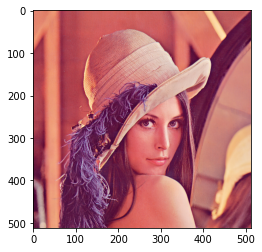

In [2]:
print("*==============* First lab *==============*")
path_to_img = "data/lenna.png"
print("Src Image: ", path_to_img)
img = cv2.imread(path_to_img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
# Shape
print("Shape: ", img.shape)
y, x, c = img.shape

Shape:  (512, 512, 3)


## 2. Face Detection

In [4]:
pass

## 3. Image cropping

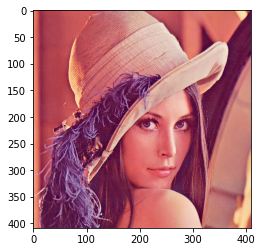

In [5]:
img = img[math.ceil(0.1 * y):math.ceil(0.9 * y), math.ceil(0.1 * x):math.ceil(0.9 * x), :]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4. Edge Detector (Canny)

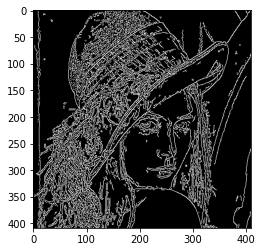

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray, 50, 100, 3);
plt.imshow(edges, cmap="gray")

## 5. Remove small contoures

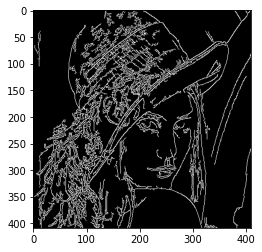

In [7]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
big_contoures = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if w >= 10 and h >= 10:
        big_contoures.append(c)
the_mask = np.zeros_like(edges)
cv2.drawContours(the_mask, big_contoures, -1, (255, 255, 255), cv2.FILLED)
edges = cv2.bitwise_and(edges, edges, mask = the_mask)
plt.imshow(edges, cmap="gray")

## 6 Dilation

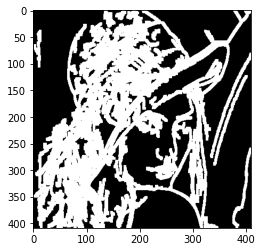

In [8]:
dilatation_size = 5
element = cv2.getStructuringElement(cv2.MORPH_RECT, (dilatation_size, dilatation_size))
dilatation = cv2.dilate(edges, element)
plt.imshow(dilatation, cmap="gray")

## 7 Gauss filter and normalization of image

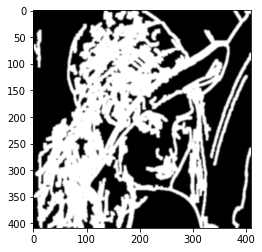

In [9]:
gauss_img = cv2.GaussianBlur(dilatation, (5, 5), 0)
plt.imshow(gauss_img, cmap="gray")

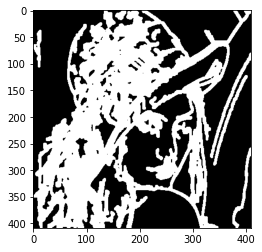

In [14]:
zeros_image = np.zeros_like(gauss_img)
m_image = cv2.normalize(gauss_img, zeros_image, 1, 0, cv2.NORM_INF)
plt.imshow(m, cmap="gray")

## 8. Bilaterial Filter - F1 image

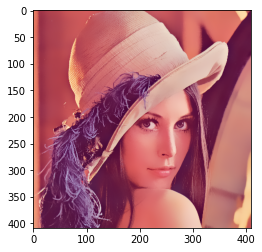

In [17]:
f1_image = cv2.bilateralFilter(img, 20, 40, 10) 
plt.imshow(cv2.cvtColor(f1_image, cv2.COLOR_BGR2RGB))

## 9. Sharping and contrast - F2 image

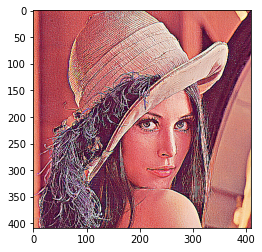

In [13]:
sharp = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
f2_image = cv2.filter2D(img, -1, sharp)
plt.imshow(cv2.cvtColor(f2_image, cv2.COLOR_BGR2RGB))

## 10. Final filter

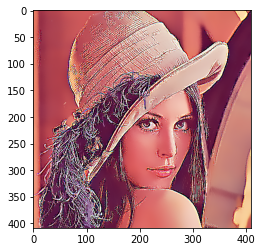

In [21]:
m_image = np.expand_dims(m_image, axis=2)
result = m_image * f2_image + (1 - m_image) * f1_image
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))